# Exploratory Data Analysis

In [1]:
import pandas as pd

In [4]:
df=pd.read_csv("final_dataset_for_model.csv")

In [5]:
df.head()

,level,thread,class,labels,Disk full,Machine down,Network disconnection,Normal,anonymized_message
0,INFO,main,org.apache.hadoop.mapreduce.v2.app.MRAppMaster,['Normal'],0,0,0,1,Created MRAppMaster for application appattempt...
1,INFO,main,org.apache.hadoop.mapreduce.v2.app.MRAppMaster,['Normal'],0,0,0,1,Executing with tokens:
2,INFO,main,org.apache.hadoop.mapreduce.v2.app.MRAppMaster,['Normal'],0,0,0,1,"Kind: YARN_AM_RM_TOKEN, Service: , Ident: (app..."
3,INFO,main,org.apache.hadoop.mapreduce.v2.app.MRAppMaster,['Normal'],0,0,0,1,Using mapred newApiCommitter.
4,INFO,main,org.apache.hadoop.mapreduce.v2.app.MRAppMaster,['Normal'],0,0,0,1,OutputCommitter set in config null


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180896 entries, 0 to 180895
Data columns (total 9 columns):
 #   Column                 Non-Null Count   Dtype 
---  ------                 --------------   ----- 
 0   level                  180896 non-null  object
 1   thread                 180896 non-null  object
 2   class                  180896 non-null  object
 3   labels                 180896 non-null  object
 4   Disk full              180896 non-null  int64 
 5   Machine down           180896 non-null  int64 
 6   Network disconnection  180896 non-null  int64 
 7   Normal                 180896 non-null  int64 
 8   anonymized_message     180896 non-null  object
dtypes: int64(4), object(5)
memory usage: 12.4+ MB


In [7]:
df.describe()

,Disk full,Machine down,Network disconnection,Normal
count,180896.000000,180896.000000,180896.000000,180896.000000
mean,0.144846,0.539724,0.181010,0.134420
std,0.351946,0.498421,0.385028,0.341104
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1.000000,0.000000,0.000000
75%,0.000000,1.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000


In [8]:
df.isnull().sum()

level                    0
thread                   0
class                    0
labels                   0
Disk full                0
Machine down             0
Network disconnection    0
Normal                   0
anonymized_message       0
dtype: int64

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

In [13]:
label_columns=['Normal', 'Machine down','Network disconnection', 'Disk full']

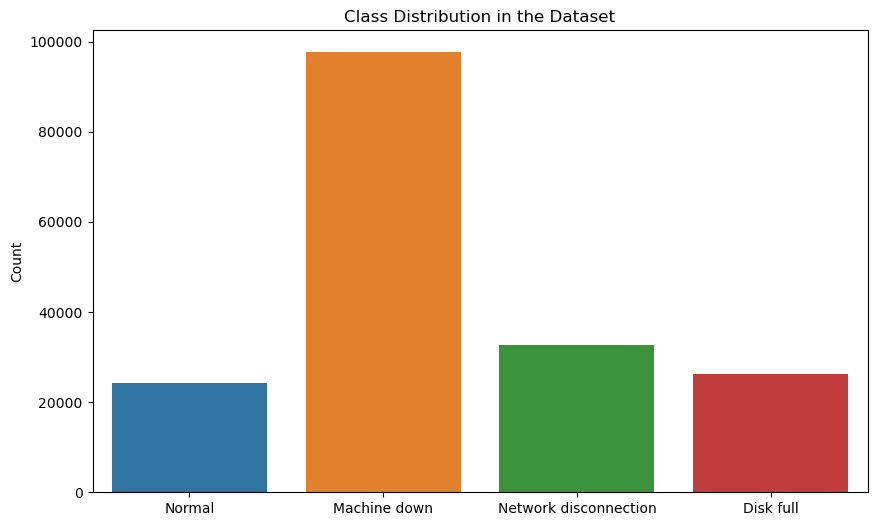

In [14]:
plt.figure(figsize=(10,6))
sns.barplot(x=label_columns, y=df[label_columns].sum())
plt.title("Class Distribution in the Dataset")
plt.ylabel("Count")
plt.show()

In [15]:
df['message_length'] = df['anonymized_message'].apply(len)

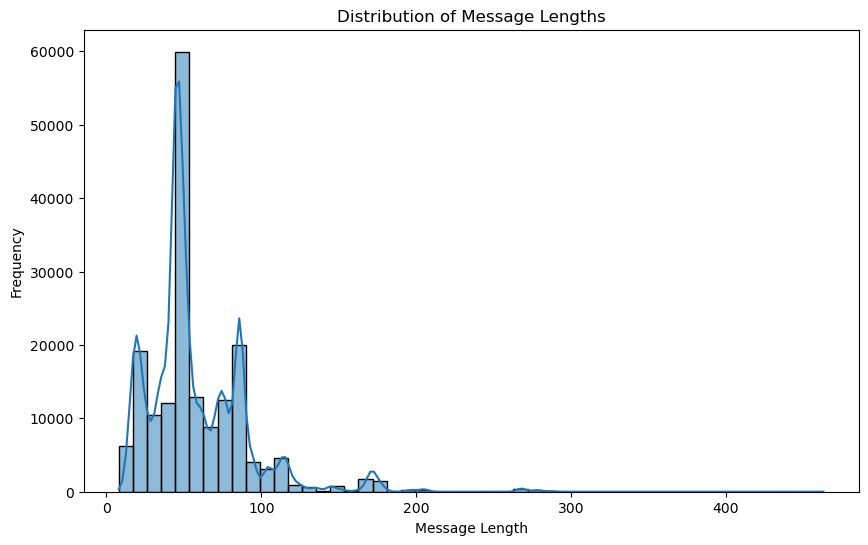

In [17]:
plt.figure(figsize=(10, 6))
sns.histplot(df['message_length'], kde=True, bins=50)
plt.title("Distribution of Message Lengths")
plt.xlabel("Message Length")
plt.ylabel("Frequency")
plt.show()

In [19]:
pip install wordcloud

  Obtaining dependency information for wordcloud from https://files.pythonhosted.org/packages/f5/b0/247159f61c5d5d6647171bef84430b7efad4db504f0229674024f3a4f7f2/wordcloud-1.9.3-cp311-cp311-win_amd64.whl.metadata
   ---------------------------------------- 0.0/300.2 kB ? eta -:--:--
   -- ------------------------------------- 20.5/300.2 kB ? eta -:--:--
   ---------------------------------------  297.0/300.2 kB 4.6 MB/s eta 0:00:01
   ---------------------------------------- 300.2/300.2 kB 4.7 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


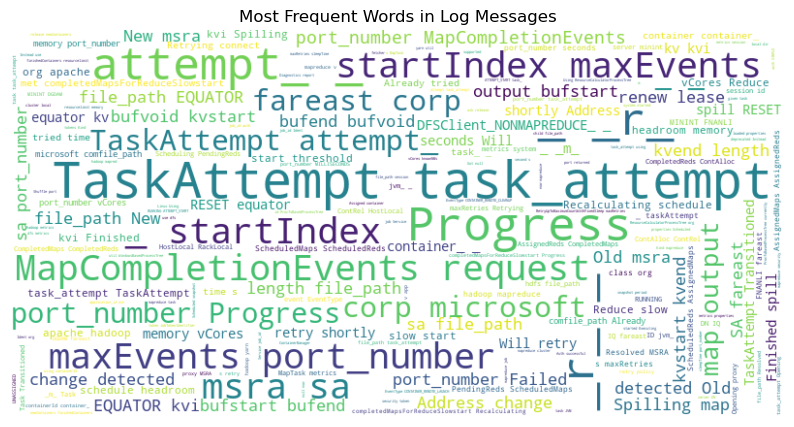

In [20]:
from wordcloud import WordCloud

# Combine all the messages into a single string
all_messages = ' '.join(df['anonymized_message'])

# Create a word cloud
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(all_messages)

# Display the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Most Frequent Words in Log Messages")
plt.show()


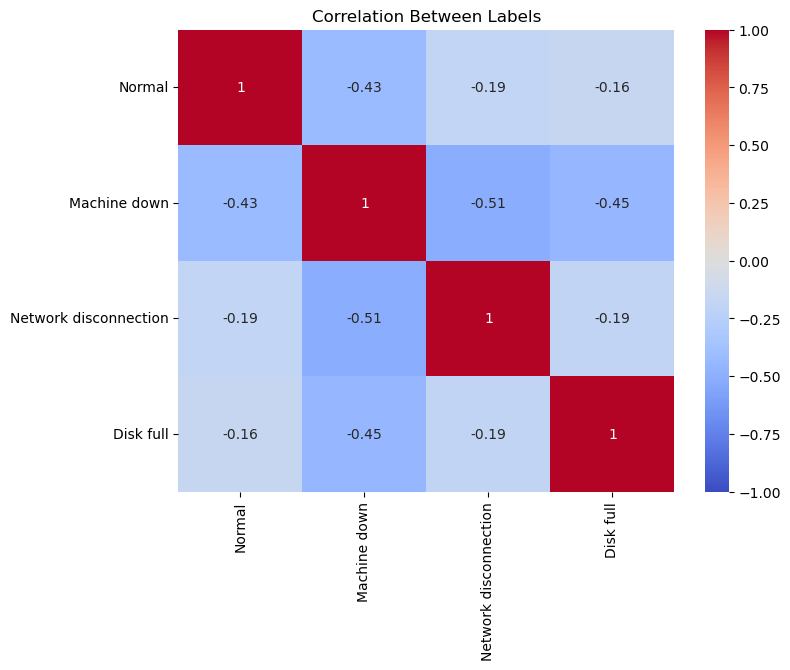

In [21]:
# Compute the correlation matrix for the label columns
correlation_matrix = df[label_columns].corr()

# Plot the heatmap of correlations
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Correlation Between Labels")
plt.show()


In [26]:
df['level'].value_counts()

level
INFO     168920
WARN      11438
ERROR       521
FATAL        17
Name: count, dtype: int64

In [25]:
df['thread'].value_counts()

thread
main                                   49606
RMCommunicator Allocator               16302
AsyncDispatcher event handler          15375
LeaseRenewer:msrabi@msra-sa-41:9000    10601
SpillThread                             4580
                                       ...  
IPC Server listener on 25270               1
Socket Reader #1 for port 25270            1
IPC Server listener on 55226               1
IPC Server listener on 49782               1
IPC Server listener on 52829               1
Name: count, Length: 2423, dtype: int64

In [24]:
print("Unique classes and their counts:")
print(df['class'].value_counts())
print("\n")

Unique classes and their counts:
class
org.apache.hadoop.mapred.TaskAttemptListenerImpl                           66558
org.apache.hadoop.mapred.MapTask                                           36991
org.apache.hadoop.mapreduce.v2.app.rm.RMContainerAllocator                 14711
org.apache.hadoop.ipc.Client                                                9360
org.apache.hadoop.mapreduce.v2.app.job.impl.TaskAttemptImpl                 7063
org.apache.hadoop.hdfs.LeaseRenewer                                         5300
org.apache.hadoop.mapreduce.v2.app.launcher.ContainerLauncherImpl           4488
org.apache.hadoop.mapred.YarnChild                                          3641
org.apache.hadoop.mapreduce.v2.app.job.impl.TaskImpl                        3341
org.apache.hadoop.yarn.util.RackResolver                                    3297
org.apache.hadoop.metrics2.impl.MetricsSystemImpl                           2907
org.apache.hadoop.mapred.Task                                         

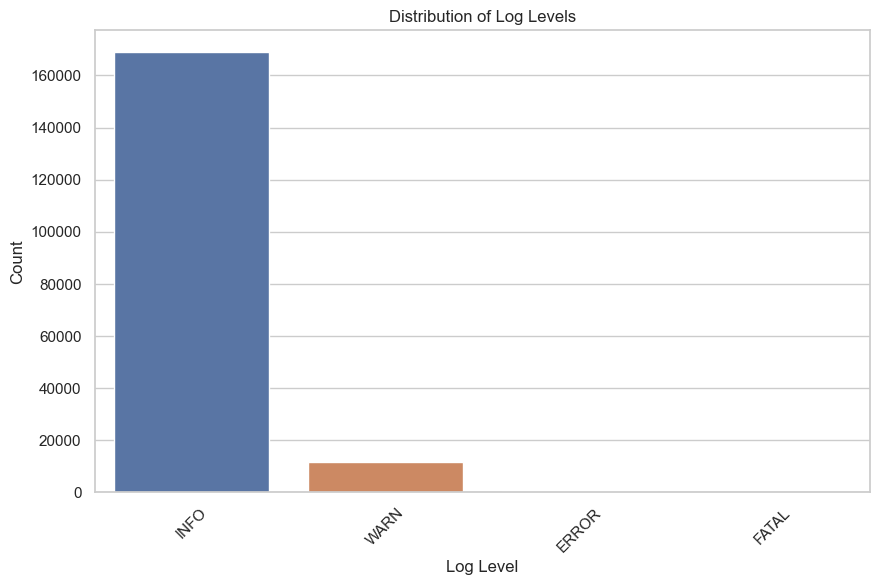

In [27]:
# Set the aesthetics for the plots
sns.set(style="whitegrid")

# Count plot for log levels
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='level', order=df['level'].value_counts().index)
plt.title('Distribution of Log Levels')
plt.xlabel('Log Level')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

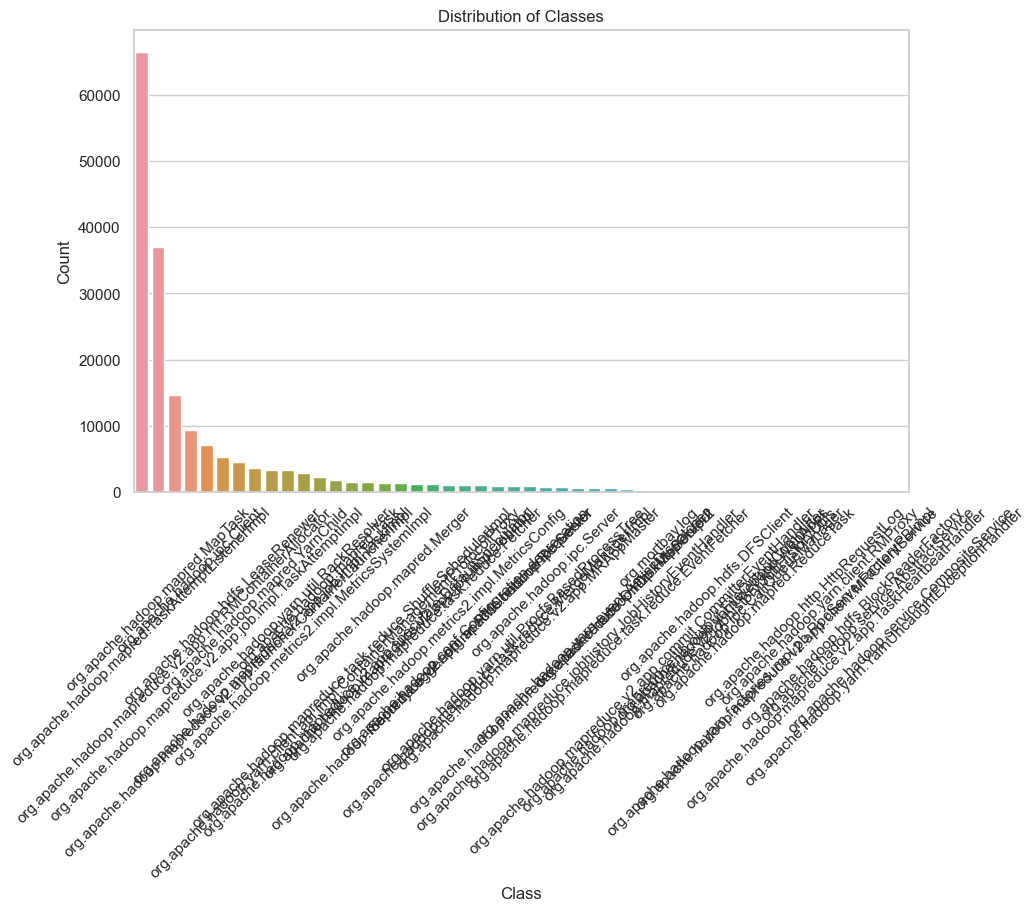

In [29]:
# Count plot for classes
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='class', order=df['class'].value_counts().index)
plt.title('Distribution of Classes')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

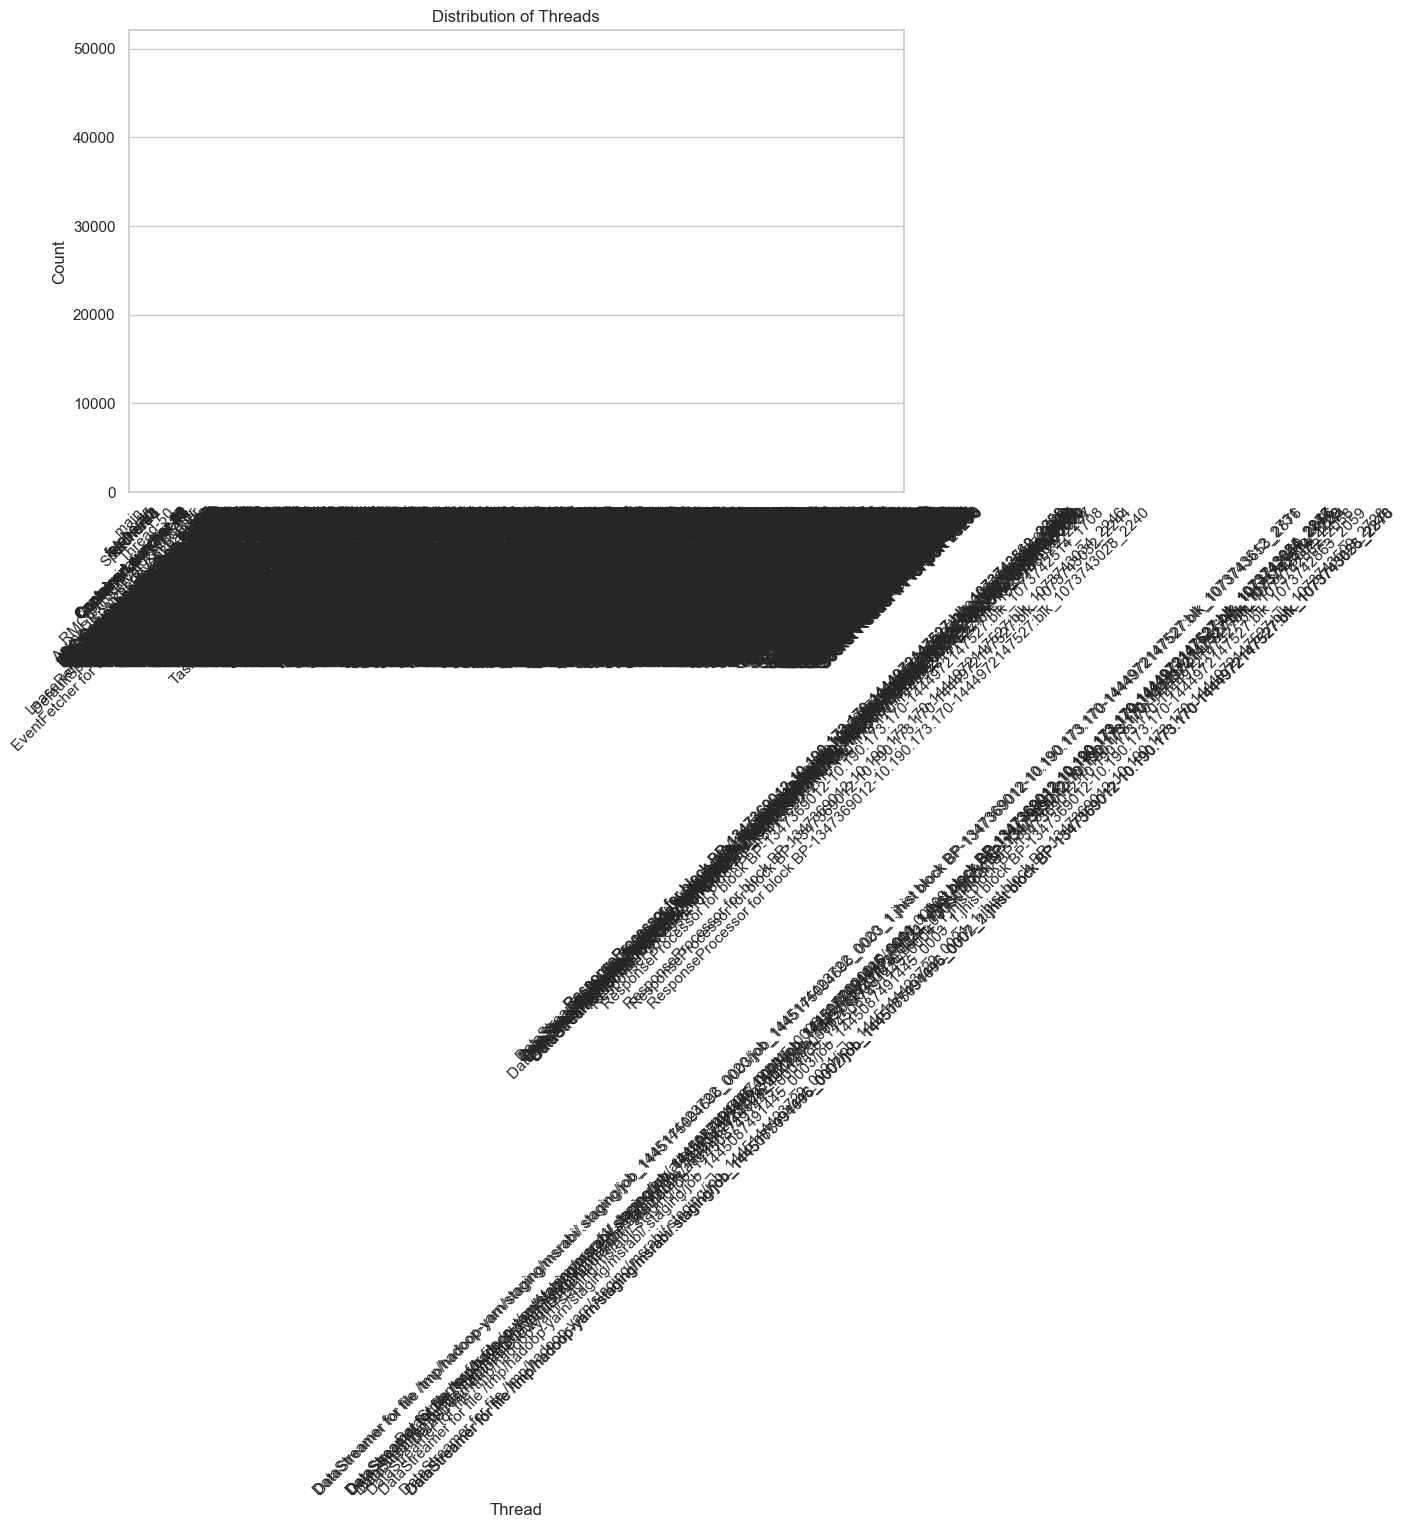

In [30]:
# Count plot for threads
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='thread', order=df['thread'].value_counts().index)
plt.title('Distribution of Threads')
plt.xlabel('Thread')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [31]:
df['level'].unique()

array(['INFO', 'WARN', 'ERROR', 'FATAL'], dtype=object)

In [32]:
df['thread'].unique()

array(['main', 'Socket Reader #1 for port 47455', 'IPC Server Responder',
       ..., 'IPC Server handler 11 on 52529',
       'IPC Server handler 25 on 52529', 'Thread-114'], dtype=object)

In [33]:
df['thread'].nunique()

2423

In [34]:
df['class'].unique()

array(['org.apache.hadoop.mapreduce.v2.app.MRAppMaster',
       'org.apache.hadoop.yarn.event.AsyncDispatcher',
       'org.apache.hadoop.mapreduce.v2.jobhistory.JobHistoryUtils',
       'org.apache.hadoop.mapreduce.jobhistory.JobHistoryEventHandler',
       'org.apache.hadoop.metrics2.impl.MetricsConfig',
       'org.apache.hadoop.metrics2.impl.MetricsSystemImpl',
       'org.apache.hadoop.mapreduce.v2.app.job.impl.JobImpl',
       'org.apache.hadoop.ipc.CallQueueManager',
       'org.apache.hadoop.ipc.Server',
       'org.apache.hadoop.yarn.factories.impl.pb.RpcServerFactoryPBImpl',
       'org.apache.hadoop.mapreduce.v2.app.client.MRClientService',
       'org.mortbay.log', 'org.apache.hadoop.http.HttpRequestLog',
       'org.apache.hadoop.http.HttpServer2',
       'org.apache.hadoop.yarn.webapp.WebApps',
       'org.apache.hadoop.mapreduce.v2.app.speculate.DefaultSpeculator',
       'org.apache.hadoop.mapreduce.v2.app.rm.RMContainerRequestor',
       'org.apache.hadoop.yarn.client.

In [35]:
df['class'].nunique()

48

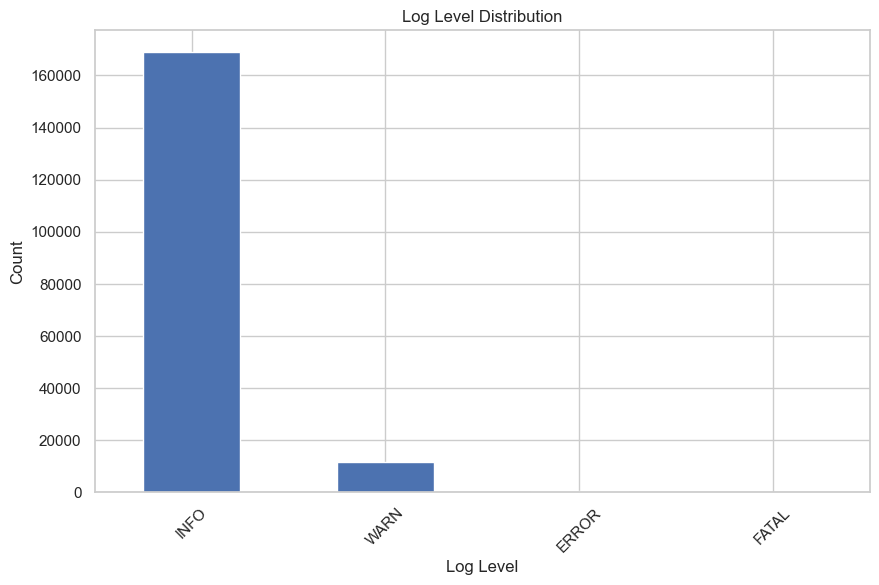

In [37]:
# Count of log levels
level_counts = df['level'].value_counts()
plt.figure(figsize=(10, 6))
level_counts.plot(kind='bar')
plt.title('Log Level Distribution')
plt.xlabel('Log Level')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


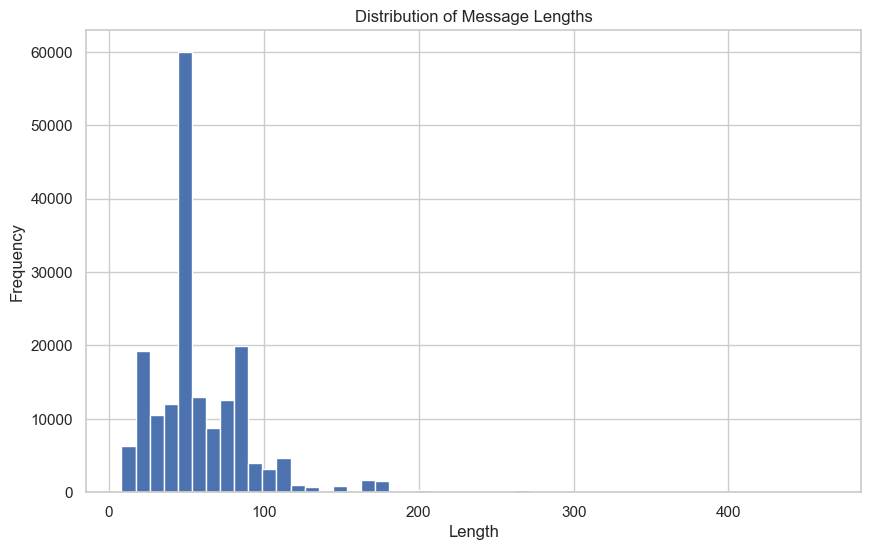

In [38]:
# Length of messages
df['message_length'] = df['anonymized_message'].apply(len)
plt.figure(figsize=(10, 6))
df['message_length'].hist(bins=50)
plt.title('Distribution of Message Lengths')
plt.xlabel('Length')
plt.ylabel('Frequency')
plt.show()


In [43]:
df_t=pd.read_csv("D:\Final Year\Major Project\dataset\merged_versions\merged_dataset_labels_hot_time.csv")

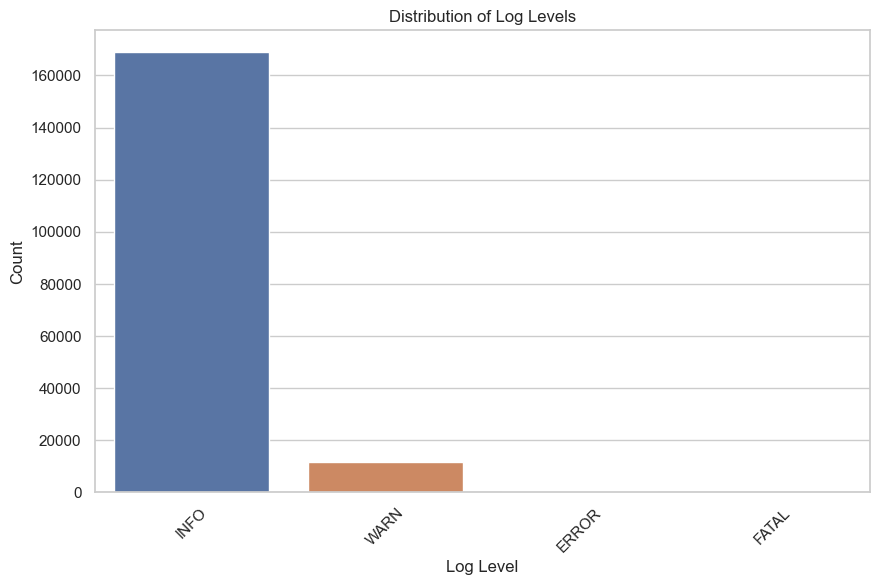

In [44]:
# Plot the distribution of levels
plt.figure(figsize=(10, 6))
sns.countplot(data=df_t, x='level', order=df_t['level'].value_counts().index)
plt.title('Distribution of Log Levels')
plt.xlabel('Log Level')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

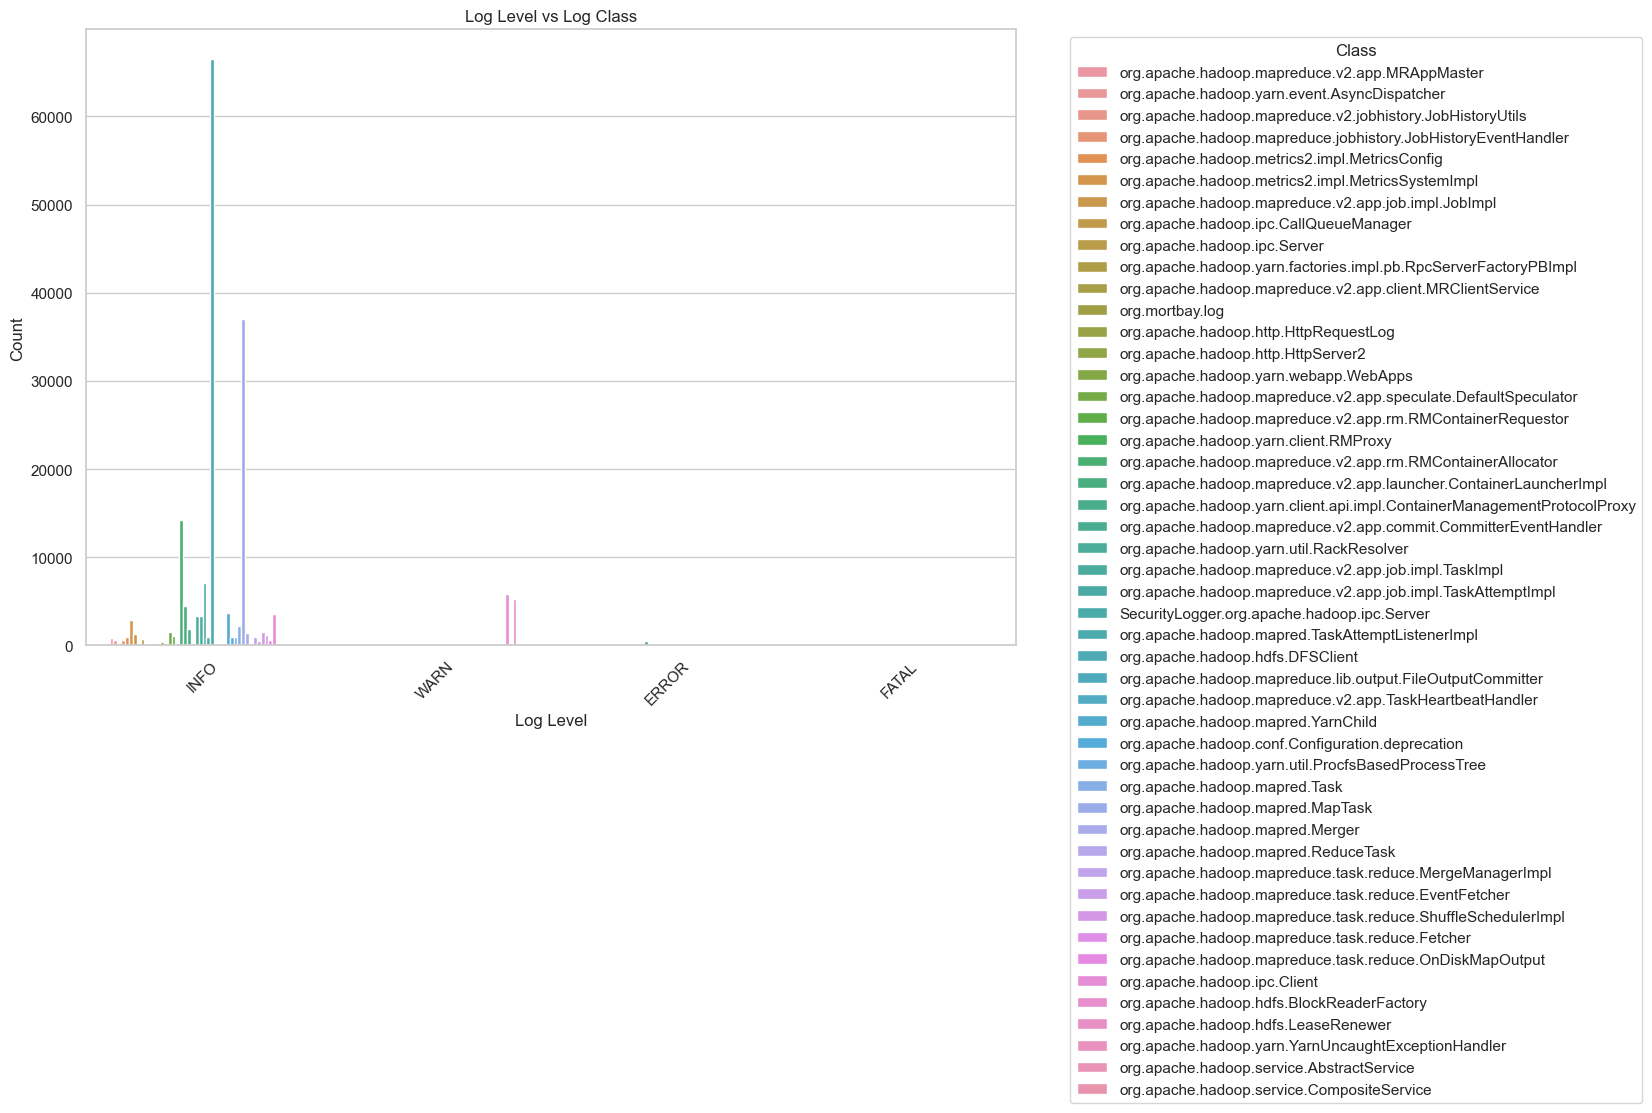

In [45]:
# Example: Check the relationship between log level and class
plt.figure(figsize=(12, 8))
sns.countplot(data=df_t, x='level', hue='class', order=df_t['level'].value_counts().index)
plt.title('Log Level vs Log Class')
plt.xlabel('Log Level')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Class', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [47]:
# Group by date and log level, and count occurrences
df_t['timestamp'] = pd.to_datetime(df_t['timestamp'])  # Ensure timestamp is in datetime format
frequency = df.groupby([df_t['timestamp'].dt.date, 'level']).size().unstack(fill_value=0)

# Plotting the frequency of log levels over time
import matplotlib.pyplot as plt

frequency.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Log Frequency by Level Over Time')
plt.xlabel('Date')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.legend(title='Log Level')
plt.tight_layout()
plt.show()

C:\Users\91766\AppData\Local\Temp\ipykernel_1480\3408556384.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_t['timestamp'] = pd.to_datetime(df_t['timestamp'])  # Ensure timestamp is in datetime format


DateParseError: hour must be in 0..23: 37:56.5, at position 0

In [46]:
df_t.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180896 entries, 0 to 180895
Data columns (total 10 columns):
 #   Column                 Non-Null Count   Dtype 
---  ------                 --------------   ----- 
 0   timestamp              180896 non-null  object
 1   level                  180896 non-null  object
 2   thread                 180896 non-null  object
 3   class                  180896 non-null  object
 4   message                180896 non-null  object
 5   labels                 180896 non-null  object
 6   Disk full              180896 non-null  int64 
 7   Machine down           180896 non-null  int64 
 8   Network disconnection  180896 non-null  int64 
 9   Normal                 180896 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 13.8+ MB
